1.长期趋势变化  
2.季节性周期变化  
3.循环变化  
4.随机性变化

### 淘宝店铺三年增长趋势和季节性波动分析  
key：重采样函数resample()，对事件进行按频率采样  
w--周  
m--月末  
q--季度  
a--年末  
as--年初  
subplots()绘制多个子图，subplots_adjust()调节子图

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [53]:
df = pd.read_excel("TaoBao.xlsx")
df.head()

,买家会员名,支付金额,宝贝总数量,宝贝标题,付款时间,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,mrkj0001,63.7,1,Java从入门到精通（第4版 附光盘）,2017-01-02 23:29:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mrkj0002,268.0,1,【明日科技】编程词典C#个人版,2017-01-03 16:01:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mrkj0003,134.0,1,【明日科技】编程词典JavaWeb个人版,2017-01-03 16:59:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mrkj0004,268.0,1,【明日科技】编程词典Java个人版,2017-01-03 16:59:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mrkj0005,999.0,1,【正版-即插即用】Java编程词典珍藏版（含500G移动硬盘）明日,2017-01-04 15:07:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df1 = df[["付款时间", "支付金额"]]
df1.head()

,付款时间,支付金额
0,2017-01-02 23:29:12,63.7
1,2017-01-03 16:01:54,268.0
2,2017-01-03 16:59:49,134.0
3,2017-01-03 16:59:49,268.0
4,2017-01-04 15:07:49,999.0


In [73]:
df1 = df1.copy()  # 创建df1的副本以避免触发警告
df1.loc[:, '付款时间'] = pd.to_datetime(df1['付款时间'], errors='coerce')
#df1['付款时间'] = pd.to_datetime(df['付款时间'])
df1.head()

,付款时间,支付金额
0,2017-01-02 23:29:12,63.7
1,2017-01-03 16:01:54,268.0
2,2017-01-03 16:59:49,134.0
3,2017-01-03 16:59:49,268.0
4,2017-01-04 15:07:49,999.0


In [79]:
# dtype('<M8[ns]') 表示该列中的数据是以纳秒为单位的时间戳
df1['付款时间'].dtype

dtype('<M8[ns]')

In [81]:
df1.loc[:, '付款时间'] = pd.to_datetime(df['付款时间'], errors='coerce')
df1.head()

,付款时间,支付金额
0,2017-01-02 23:29:12,63.7
1,2017-01-03 16:01:54,268.0
2,2017-01-03 16:59:49,134.0
3,2017-01-03 16:59:49,268.0
4,2017-01-04 15:07:49,999.0


In [83]:
df1 = df1.set_index('付款时间')

In [87]:
# 按年统计
# resample('AS')：按照年度重采样（AS 代表“年初开始的采样”），并计算年度数据的总和。
# to_period('A')：将日期索引转换为年度周期格式。
df_y = df1.resample('AS').sum().to_period('A')
df_y

C:\Users\杜苏苏\AppData\Local\Temp\ipykernel_7440\4020675524.py:4: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_y = df1.resample('AS').sum().to_period('A')
C:\Users\杜苏苏\AppData\Local\Temp\ipykernel_7440\4020675524.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_y = df1.resample('AS').sum().to_period('A')


,支付金额
付款时间,
2017,148411.21
2018,218711.61
2019,189743.51


In [89]:
# 按年统计
# resample('YS')：按照年度重采样（YS 代表“年初开始的采样”），并计算年度数据的总和。
# to_period('Y')：将日期索引转换为年度周期格式。
df_y = df1.resample('YS').sum().to_period('Y')
df_y

,支付金额
付款时间,
2017,148411.21
2018,218711.61
2019,189743.51


In [93]:
# 按季度统计
df_q = df1.resample('QE').sum().to_period('Q')
df_q

,支付金额
付款时间,
2017Q1,35779.2
2017Q2,31737.53
2017Q3,28866.8
2017Q4,52027.68
2018Q1,58230.83
2018Q2,62160.49
2018Q3,44942.19
2018Q4,53378.1
2019Q1,39399.32


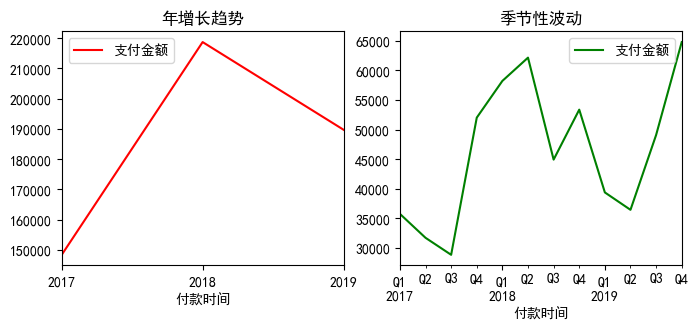

In [95]:
# 绘制子图：
fig = plt.figure(figsize=(8, 3))
ax = fig.subplots(1, 2)
df_y.plot(subplots=True, ax=ax[0], color='r')
ax[0].set_title('年增长趋势')


df_q.plot(subplots=True, ax=ax[1], color='g')
ax[1].set_title('季节性波动')

# 调整布局
plt.subplots_adjust(top=0.98, bottom=0.2)

plt.show()

In [47]:
df = pd.read_excel("TaoBao.xlsx")
df1 = df[["付款时间", "支付金额"]]
df1.loc[:, '付款时间'] = pd.to_datetime(df['付款时间'], errors='coerce')
df1.set_index('付款时间')
df_y = df1.resample('AS').sum().to_period('A')

D:\Anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\杜苏苏\AppData\Local\Temp\ipykernel_7440\4293054467.py:5: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_y = df1.resample('AS').sum().to_period('A')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'